In [1]:
import importlib
experiment_1 = importlib.import_module("experiment 1")
importlib.reload(experiment_1)
import importlib
generate_dataset = importlib.import_module("generate_dataset")
importlib.reload(generate_dataset)

preprocessing_datasetv = importlib.import_module("preprocessing_dataset")
importlib.reload(preprocessing_datasetv)

Using TensorFlow backend.


<module 'preprocessing_dataset' from 'F:\\Jelena\\FAKULTET\\Student\\DOKTORAT\\projekat 2rad\\oop\\preprocessing_dataset.py'>

In [2]:
from generate_dataset import *
from neural_net import *
from plotting import *
from postprocessing_dataset import *
from predicting import *
from preprocessing_dataset import *
from testing import *
import json

In [6]:
experiment_1.export_dataset(generate_dataset.generate_raw_dataset_B(5000,5,600),"data_B.json")

Data diversity

In [7]:
data = experiment_1.import_dataset("data_A.json")
data_train,data_test = experiment_1.make_train_test(data, 5000, 0)
X_train = experiment_1.generate_2D_features_from_raw_dataset(data_train,600,10)
dataset_prec_recall_per_type = experiment_1.measure_prec_recall_between_datasets(X_train[:,:10,:],X_train[:,:10,:])
dataset_f1_per_type = experiment_1.measure_f1_between_datasets(dataset_prec_recall_per_type)

broj features
20
max
10
0
1
2
3


KeyboardInterrupt: 

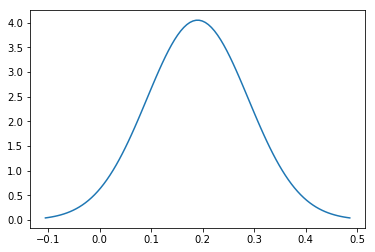

In [117]:
### napravila sam gresku u prethodnom, nisam stavila da X-train[:,:10,:] nego samo X_train pa zbog toga ovde ide 
###dataset_f1_per_type[:,:10,:]
a = (dataset_f1_per_type[:,:,:]).mean(axis = 1)
ld = experiment_1.leave_diagonal(a)
mean,sigma = experiment_1.plot_pdf_dataset(ld)

In [252]:
mean

0.19023675055589992

In [121]:
sigma

0.09855883259613059

In [119]:
with open('data_diversity_layout2.npy', 'wb') as f:
    np.save(f, ld) 
# all_train_examp_vs_train_np1 = np.load('all_train_examp_vs_train_np.npy')

In [50]:
# isti = []
# for j in range(0,5000):
#     for i in range(0,5000):
#             isti.append(i) if (data_train['objects'][j]==data_train['objects'][i]).sum()==20 else isti
# print(isti)

KeyboardInterrupt: 

In [104]:
# import numpy as np
# dataset_f1 = np.load("F:\\Jelena\FAKULTET\\Student\\DOKTORAT\\projekat 2rad\\oop\\experiments_A\\paper\\data\\diversity\\all_train_examp_vs_train_np.npy")
# # dataset_f1_per_type = measure_f1_between_datasets(dataset_f1)
# dataset_f1_per_type = experiment_1.measure_f1_between_datasets(dataset_f1)
# f11 = dataset_f1_per_type.mean(axis = 1)
# mean,sigma = experiment_1.plot_pdf_dataset(f11)

F:\Jelena\FAKULTET\Student\DOKTORAT\projekat 2rad\oop\experiment 1.py:197: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num( 2 * (prec_recall_between_dataset[:,:,0,:] * prec_recall_between_dataset[:,:,1,:])/(prec_recall_between_dataset[:,:,0,:] + prec_recall_between_dataset[:,:,1,:]))


In [45]:
data_train['objects'][4]==data_train['objects'][4]

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

Generate dataset

In [22]:
# data_raw = generate_dataset.generate_raw_dataset_B(5000, 10, 600, num_instances=1)
# experiment_1.export_dataset(data_raw)

In [ ]:
# #validna verzija treniranja
# ### cross validation
# precissions_types_train_iterations = []# broj iteracija, broj razlicitih velicina trening skupa, broj tipova,broj primera
# recall_types_train_iterations = []
# precissions_types_test_iterations = []
# recall_types_test_iterations = []
# isti = []
# for i in range(0,10):
#     data = experiment_1.import_dataset("data_B.json")
#     data_train,data_test = experiment_1.make_train_test(data, 4000, 1000)
#     for i in range(0,4000):
#         isti.append(i) if (data_train['objects'][0]==data_train['objects'][i]).sum()==20 else isti
#     print(isti)
    
#     precissions_types_train,recall_types_train,precissions_types_test,recall_types_test = experiment_1.experiment_A_1_per_ex(data_train,data_test,[100,200,500,1000,4000],1000)
#     precissions_types_train_iterations.append(precissions_types_train)
#     recall_types_train_iterations.append(recall_types_train)
#     precissions_types_test_iterations.append(precissions_types_test)
#     recall_types_test_iterations.append(recall_types_test)
#     print("finish")

In [20]:
data_train

{'objects': array([[[  0,  48],
         [ 48,  58],
         [106,  56],
         ...,
         [367,  32],
         [399,  47],
         [446,  47]],
 
        [[  0,  51],
         [ 51,  32],
         [ 83,  44],
         ...,
         [265,  56],
         [321,  60],
         [381,  55]],
 
        [[  0,  13],
         [ 13,  24],
         [ 37,  45],
         ...,
         [209,  50],
         [259,  55],
         [314,  28]],
 
        ...,
 
        [[  0,  15],
         [ 15,  57],
         [ 72,  55],
         ...,
         [308,  26],
         [334,  58],
         [392,  49]],
 
        [[  0,  57],
         [ 57,  37],
         [ 94,  39],
         ...,
         [343,  32],
         [375,  24],
         [399,  18]],
 
        [[  0,  16],
         [ 16,  14],
         [ 30,  12],
         ...,
         [183,  45],
         [228,  55],
         [283,  17]]])}

broj features
20
max
10
broj features
20
max
10
600
(10000, 1, 600, 20)
(10000, 600)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 596, 20)        2020      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 596, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 592, 20)        2020      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 592, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 270)               3197070   
_________________________________________________________

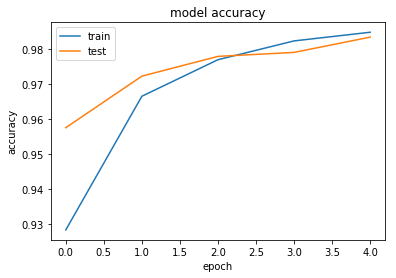

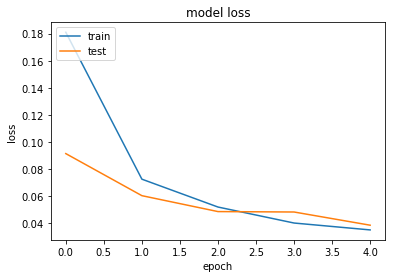

(10, 1000, 600)


F:\Jelena\FAKULTET\Student\DOKTORAT\projekat 2rad\oop\testing.py:25: RuntimeWarning: invalid value encountered in true_divide
  precission =  np.nan_to_num(np.logical_and(pred1[start:end],Y_test[start:end]).sum(axis = 1)/(pred1[start:end].sum(axis = 1))) if pred1[start:end].sum()!=0 else 0


broj features
20
max
10
600
(10000, 1, 600, 20)
(10000, 600)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 596, 20)        2020      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 596, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 592, 20)        2020      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 592, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 270)               3197070   
_________________________________________________________________
re_lu_2 (ReLU) 

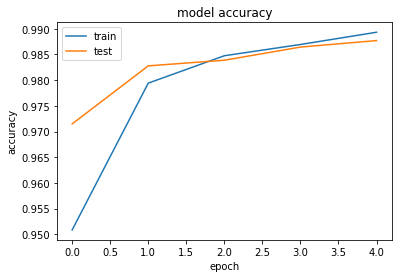

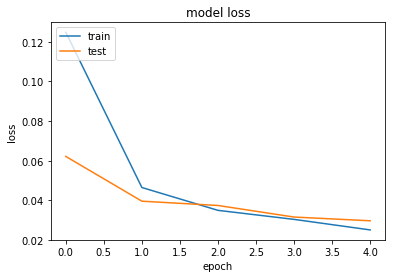

(10, 1000, 600)
broj features
20
max
10
600
(10000, 1, 600, 20)
(10000, 600)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 596, 20)        2020      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 596, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 592, 20)        2020      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 592, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 270)               3197070   
_________________________________________________________________

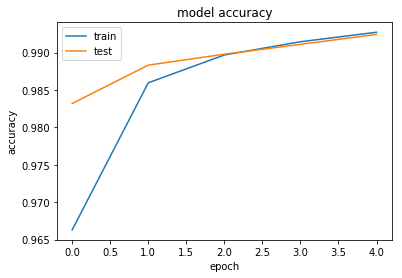

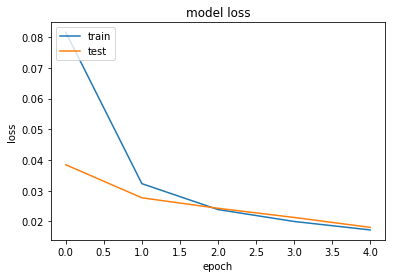

(10, 1000, 600)
broj features
20
max
10
600
(10000, 1, 600, 20)
(10000, 600)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 596, 20)        2020      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 596, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 592, 20)        2020      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 592, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 270)               3197070   
_________________________________________________________________

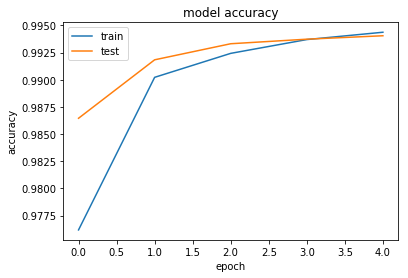

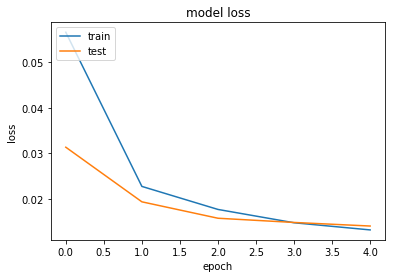

(10, 1000, 600)
broj features
20
max
10
600
(10000, 1, 600, 20)
(10000, 600)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 596, 20)        2020      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 596, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 592, 20)        2020      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 592, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11840)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 270)               3197070   
_________________________________________________________________

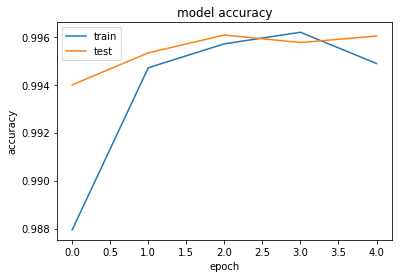

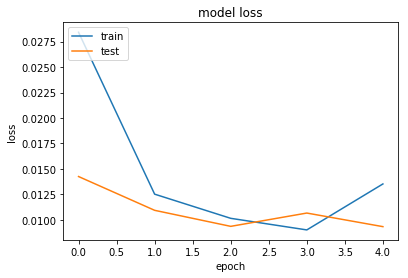

(10, 1000, 600)


In [8]:
results = []
for i in range(0,1):
    data = experiment_1.import_dataset("data_A.json")
    data_train,data_test = experiment_1.make_train_test(data, 4000, 1000)
    results.append(experiment_1.experiment_A_2_per_ex(data_train,data_test,[100, 200, 500, 1000, 4000],1000,10))

In [44]:
data["objects"].shape



(5000, 10, 2)

In [191]:
len(results[0][0][0])

5000

In [8]:
data_train.keys()

dict_keys(['objects'])

In [9]:
avg_space_pip1 = experiment_1.avg_iterations_space([results[i][3] for i in range(0,1)],[results[i][0] for i in range(0,1)],pip = True)
avg_space_seq1 = experiment_1.avg_iterations_space([results[i][4] for i in range(0,1)],[results[i][1] for i in range(0,1)],pip = False)

1000
1000
1000
1000
1000


IndexError: list index out of range

In [10]:
import pickle
with open("results_", "wb") as fp:   #Pickling
    pickle.dump(results, fp)



MemoryError: 

In [32]:
avg_space_pip = experiment_1.avg_iterations_space([results[0][3] for i in range(0,5)],[results[0][0] for i in range(0,5)],pip = True)
avg_space_seq = experiment_1.avg_iterations_space([results[0][4] for i in range(0,5)],[results[0][1] for i in range(0,5)],pip = False)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [132]:
lika.shape

(5, 9)

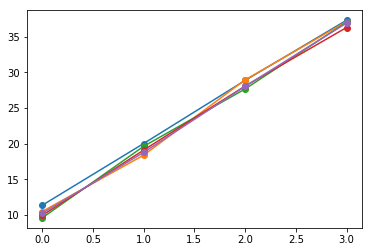

In [201]:
lika = avg_space_pip1.mean(axis = 1).mean(axis = 2)
for i in range(0,5):
    plt.plot(lika[i][:4],"-o")
plt.savefig("space_B1.png")

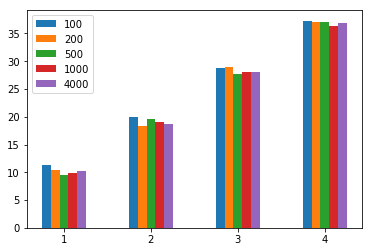

In [220]:
widthh =0.1
pomeraj = -0.3
plt.bar(pomeraj + widthh + np.arange(4),lika[0],width = widthh)
plt.bar(pomeraj + widthh*2 + np.arange(4),lika[1],width = widthh)
plt.bar(pomeraj + widthh*3 + np.arange(4),lika[2],width = widthh)
plt.bar(pomeraj + widthh*4 + np.arange(4),lika[3],width = widthh)
plt.bar(pomeraj + widthh*5 + np.arange(4),lika[4],width = widthh)
plt.xticks(np.arange(4), ["1","2",'3','4'])
plt.legend( ['100', '200', '500','1000','4000'] )
plt.savefig("space_B.png")

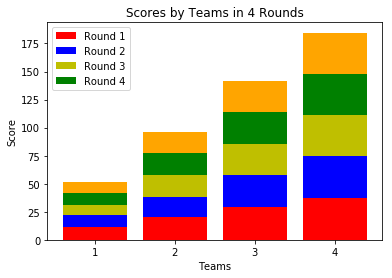

In [210]:
x = ["1","2",'3','4']
plt.bar(x, lika[0], color='r')
plt.bar(x, lika[1], bottom=lika[0], color='b')
plt.bar(x,lika[2], bottom=lika[0]+lika[1], color='y')
plt.bar(x, lika[3], bottom=lika[0]+lika[1]+lika[2], color='g')
plt.bar(x, lika[4], bottom=lika[0]+lika[1]+lika[2] + lika[3], color='orange')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

In [ ]:
plt.plot()

In [160]:
len(results[0][5][0])

10

In [164]:
precissions_types_seq.shape

(5, 10)

In [180]:
def change_shape(niz):
    return niz.reshape(1,5,5,1000)

In [32]:
len(results[0][0][0])

10000

In [ ]:
results

In [34]:

precissions_types_pip = (results[0][5]+results[1][5]+results[2][5]+results[3][5]+results[4][5])/5
precissions_types_seq = (results[0][7]+results[1][7]+results[2][7]+results[3][7]+results[4][7])/5
recall_types_pip = (results[0][6]+results[1][6]+results[2][6]+results[3][6]+results[4][6])/5
recall_types_seq = (results[0][8]+results[1][8]+results[2][8]+results[3][8]+results[4][8])/5

precissions_types_pip = change_shape(precissions_types_pip)
precissions_types_seq = change_shape(precissions_types_seq)
recall_types_pip =change_shape(recall_types_pip)
recall_types_seq = change_shape(recall_types_seq)

f1 = experiment_1.f1_obj(precissions_types_pip,recall_types_pip)
experiment_1.plot_metric_by_type_and_size(f1,"f1 test")
plt.title("f1 by types")

plt.savefig("prec type pip.png")

IndexError: list index out of range

In [36]:
f1 = experiment_1.f1_obj(results[0][5],[results[0][6])
experiment_1.plot_metric_by_type_and_size(f1,"f1 test")
# plt.title("f1 by types")

TypeError: can't multiply sequence by non-int of type 'list'

[98.45809885089247]
[98.45809885089247]


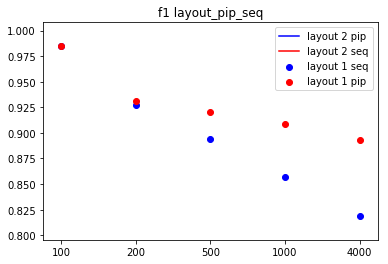

In [38]:
#ovde iscrtavam sa svih 10 elemenata

experiment_1.plot_f1_by_size(results[0][5],results[0][6],'b',1)
experiment_1.plot_f1_by_size(results[0][7],results[0][8],'r',1)

plt.title("f1 layout_pip_seq")

# plt.plot([0.7648202744406699, 0.832976592959185, 0.871542105125447, 0.9058588306821134, 0.9406073615627649],"o--b")
# plt.plot([0.6394956147283328, 0.6670038742606214, 0.7345707975084114, 0.811756291748759, 0.8610664408543205],"o--r")

plt.legend(["layout 2 pip","layout 2 seq","layout 1 seq","layout 1 pip"])
plt.savefig("f1 pip seq layout 1_10_2_5.png")

In [41]:
len(results[0][0])

5

In [23]:
results[0][5]

IndexError: index 5 is out of bounds for axis 0 with size 5

[0.7298916929013275, 0.8150178332734828, 0.8729096005470119, 0.9014962101756113, 0.9414293629541656]
[0.8041848097322242, 0.8702946146235162, 0.9155963736340587, 0.9376777070283239, 0.9651303952445723]


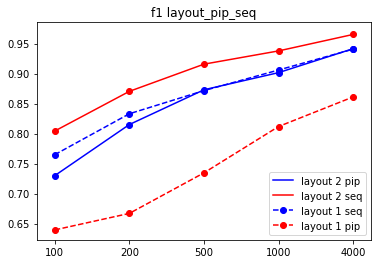

In [251]:
#ovde iscrtavam sa svih 10 elemenata

experiment_1.plot_f1_by_size(precissions_types_pip,recall_types_pip,'b')
experiment_1.plot_f1_by_size(precissions_types_seq,recall_types_seq,'r')

plt.title("f1 layout_pip_seq")

plt.plot([0.7648202744406699, 0.832976592959185, 0.871542105125447, 0.9058588306821134, 0.9406073615627649],"o--b")
plt.plot([0.6394956147283328, 0.6670038742606214, 0.7345707975084114, 0.811756291748759, 0.8610664408543205],"o--r")

plt.legend(["layout 2 pip","layout 2 seq","layout 1 seq","layout 1 pip"])
plt.savefig("f1 pip seq layout 1_10_2_5.png")

[0.7298916929013275, 0.8150178332734828, 0.8729096005470119, 0.9014962101756113, 0.9414293629541656]
[0.8041848097322242, 0.8702946146235162, 0.9155963736340587, 0.9376777070283239, 0.9651303952445723]
[0.7807543306981095, 0.8032920975640091, 0.8549609822184796, 0.8977214894195896, 0.9344052529213472]
[0.8222730779071269, 0.8727265266619161, 0.9028818313048907, 0.9352683585997223, 0.9600455702344836]


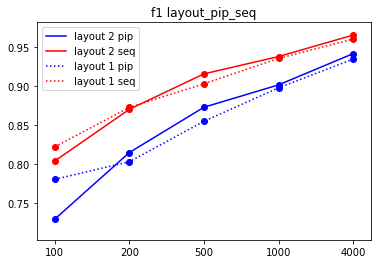

In [277]:
#ovde samo pet

experiment_1.plot_f1_by_size(precissions_types_pip,recall_types_pip,'b')
experiment_1.plot_f1_by_size(precissions_types_seq,recall_types_seq,'r')

plt.title("f1 layout_pip_seq")

experiment_1.plot_f1_by_size(precissions_types_pipea[:,:,:5,:],recall_types_pipea[:,:,:5,:],'b','dotted')
experiment_1.plot_f1_by_size(precissions_types_seqea[:,:,:5,:],recall_types_seqea[:,:,:5,:],'r','dotted')
plt.legend(["layout 2 pip","layout 2 seq","layout 1 pip","layout 1 seq"])
plt.savefig("f1 pip seq layout 1_5_2_5.png")

[0.7648202744406699, 0.832976592959185, 0.871542105125447, 0.9058588306821134, 0.9406073615627649]
[0.6394956147283328, 0.6670038742606214, 0.7345707975084114, 0.811756291748759, 0.8610664408543205]


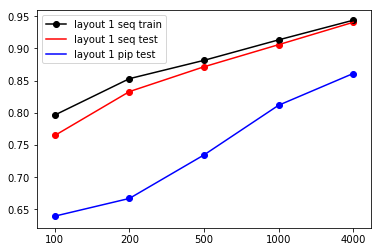

In [270]:
## train l1 seq 
plt.plot([0.7965612950165839, 0.8530708877015819, 0.8815269456627519, 0.9133355246157251, 0.9438375188823656],'o-k')
experiment_1.plot_f1_by_size(precissions_types_seqea,recall_types_seqea,'r')

# plt.plot([0.7494212477268583, 0.8292366483273895, 0.8688168979298846, 0.9065769963747613, 0.9415318623593256],'o-r')
experiment_1.plot_f1_by_size(precissions_types_pipea,recall_types_pipea,'b')

plt.legend(["layout 1 seq train","layout 1 seq test","layout 1 pip test"])
plt.savefig("seq test seq train, pip test f1 la")

In [224]:
results_eA = []
root = r"F:\\Jelena\\FAKULTET\\Student\\DOKTORAT\\projekat 2rad\\oop\\experiments_A\\paper\\data 1 2\\pip seq\results_pip"
for i in range(0,5):
    print(i)
    file = open(root+str(i), 'rb')
    results_eA.append(pickle.load(file))

0
1
2
3
4


In [227]:
len(results_eA[0][0][0])

10000

In [228]:
def change_shape(niz):
    return niz.reshape(1,5,10,1000)

1
1
1
1
1


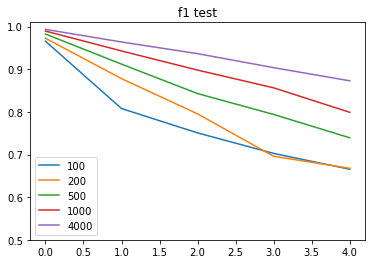

In [229]:

precissions_types_pipea = (results_eA[0][5]+results_eA[1][5]+results_eA[2][5]+results_eA[3][5]+results_eA[4][5])/5
precissions_types_seqea = (results_eA[0][7]+results_eA[1][7]+results_eA[2][7]+results_eA[3][7]+results_eA[4][7])/5
recall_types_pipea = (results_eA[0][6]+results_eA[1][6]+results_eA[2][6]+results_eA[3][6]+results_eA[4][6])/5
recall_types_seqea = (results_eA[0][8]+results_eA[1][8]+results_eA[2][8]+results_eA[3][8]+results_eA[4][8])/5

precissions_types_pipea = change_shape(precissions_types_pipea)
precissions_types_seqea = change_shape(precissions_types_seqea)
recall_types_pipea =change_shape(recall_types_pipea)
recall_types_seqea = change_shape(recall_types_seqea)

f1ea = experiment_1.f1_obj(precissions_types_pipea[:,:,:5,:],recall_types_pipea[:,:,:5,:])
experiment_1.plot_metric_by_type_and_size(f1ea,"f1 test")
# plt.title("f1 by types")

# plt.savefig("prec type pip.png")